# Exercises
**Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.**
____

## 1.  Clustering with the Iris Dataset
##### Using this lesson as a guide, perform clustering on the `iris` dataset.
- 1a. Choose features other than the ones used in the lesson.
- 1b. Visualize the results of your clustering.
- 1c. Use the elbow method to visually select a good value for k.
- 1d. Repeat the clustering, this time with 3 different features.

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

## 3. How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

**Bonus**
- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data.
- c) Write down the takeaways from this exercise.




### Imports:

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
# import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

# ~ 1a. ~

In [3]:
# SKlearn implementation
from pydataset import data

# import data
iris = data('iris')
iris.head()

# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


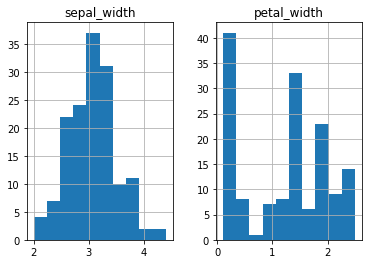

In [28]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

X.hist();

In [29]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [30]:
# sklearn implementation of KMeans

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [31]:
# make a new column named cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
134,6.3,2.8,5.1,1.5,virginica,2
127,6.2,2.8,4.8,1.8,virginica,1
96,5.7,3.0,4.2,1.2,versicolor,2
73,6.3,2.5,4.9,1.5,versicolor,2
108,7.3,2.9,6.3,1.8,virginica,1
88,6.3,2.3,4.4,1.3,versicolor,2
121,6.9,3.2,5.7,2.3,virginica,1
51,7.0,3.2,4.7,1.4,versicolor,1
64,6.1,2.9,4.7,1.4,versicolor,2
53,6.9,3.1,4.9,1.5,versicolor,1


### Attributes for Kmeans : 

- cluster_centers_: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [50]:
# Cluster Centers aka centroids

kmeans.cluster_centers_

# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

# Centriods for unscaled data
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()

# unscaled centroids

scaler.inverse_transform(kmeans.cluster_centers_)

# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# ~ 1b. ~

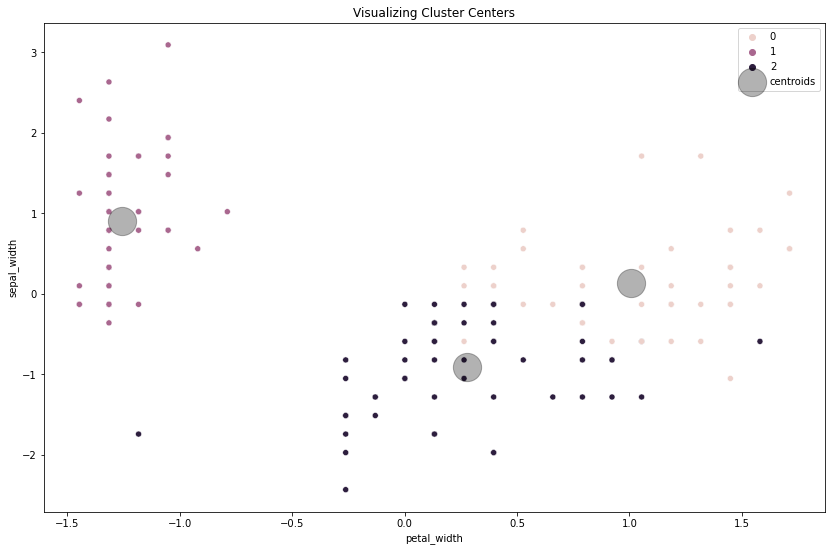

In [51]:
# visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [35]:
# to avoid Seaborn 'hue' issue with integers, Ravinder changes the cluster columns from integer to string:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


## How to choose 'k'

#### A-*priori* knowledge about application domain/educated guess
-  How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)

#### Search for a 'good' k value
- Try different k values and evaluate results
    - Inertia = sum of squared distances from each point to it's assigned centroid  
    - minimize inertia(?)
    - Use elbow method (using inertia) to choose k

#### Use hierarchical clustering
- Try on a subset of data and guess k

# ~ 1c. ~

In [37]:
kmeans.inertia_

79.24744370877896

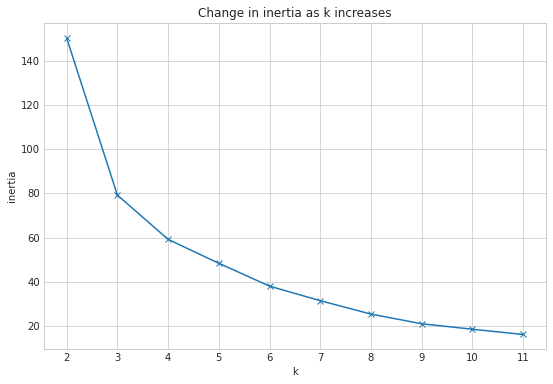

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

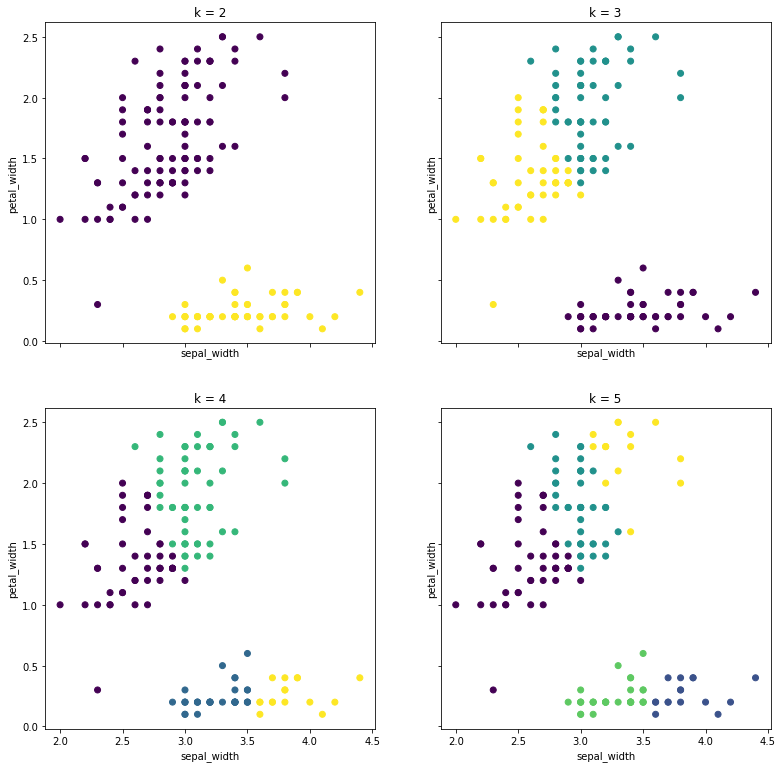

In [43]:
# another way

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_width', ylabel='petal_width')

# ~ 1d. ~

In [54]:
# SKlearn implementation
from pydataset import data

# import data
iris = data('iris')
iris.head()

# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


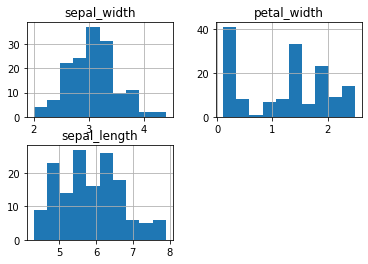

In [55]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width', 'sepal_length']]
X.head()

X.hist();

In [56]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,sepal_width,petal_width,sepal_length
1,1.019004,-1.315444,-0.900681
2,-0.131979,-1.315444,-1.143017
3,0.328414,-1.315444,-1.385353
4,0.098217,-1.315444,-1.506521
5,1.249201,-1.315444,-1.021849


In [57]:
# sklearn implementation of KMeans

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [58]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
49,5.3,3.7,1.5,0.2,setosa,1
52,6.4,3.2,4.5,1.5,versicolor,0
73,6.3,2.5,4.9,1.5,versicolor,2
86,6.0,3.4,4.5,1.6,versicolor,0
15,5.8,4.0,1.2,0.2,setosa,1
119,7.7,2.6,6.9,2.3,virginica,0
31,4.8,3.1,1.6,0.2,setosa,1
102,5.8,2.7,5.1,1.9,virginica,2
14,4.3,3.0,1.1,0.1,setosa,1
128,6.1,3.0,4.9,1.8,virginica,0


In [59]:
# Cluster Centers aka centroids

kmeans.cluster_centers_

# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width', 'sepal_length'].mean()

# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

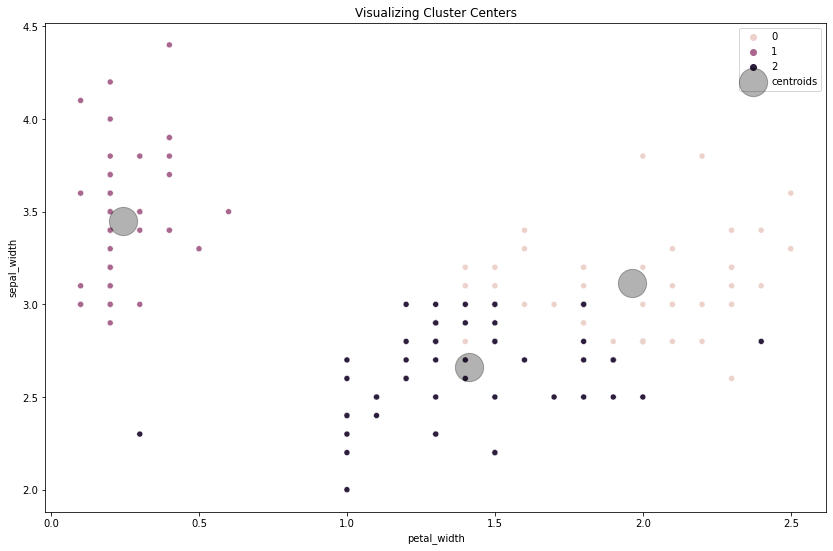

In [62]:
# visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

# ~ 2. ~

In [91]:
import env
import wrangle_functions
from sklearn.model_selection import train_test_split

db_name = "mall_customers"
query = 'SELECT * FROM customers'

url  = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db_name}'
df = pd.read_sql(query, url, index_col="customer_id")

df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

In [92]:
train, test = train_test_split(df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [94]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [96]:
from sklearn.preprocessing import MinMaxScaler 
####SCALED DATA####
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["gender"]).columns.tolist()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

# Add back in the gender column to the dataframes
train_scaled["gender"] = train.gender.copy()
validate_scaled["gender"] = validate.gender.copy()
test_scaled["gender"] = test.gender.copy()

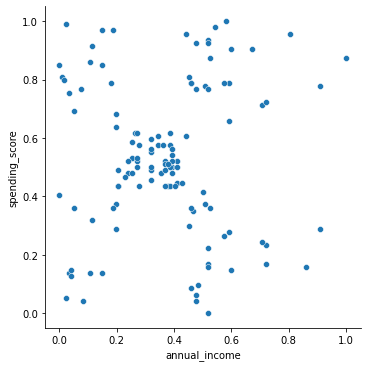

In [98]:
sns.relplot(x="annual_income", y="spending_score", data=train_scaled);

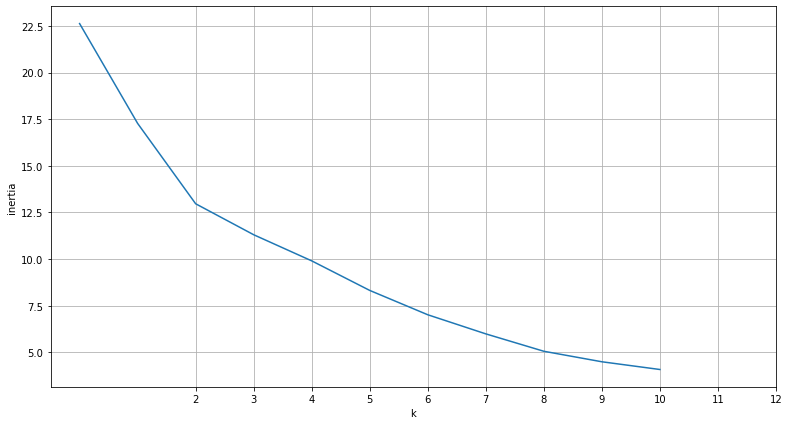

In [99]:
X = train_scaled.copy()

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [100]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=5

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,2
49,1,0.211538,0.204918,0.436170,1
25,1,0.692308,0.106557,0.138298,2
137,1,0.500000,0.475410,0.063830,2
177,0,0.769231,0.598361,0.148936,0


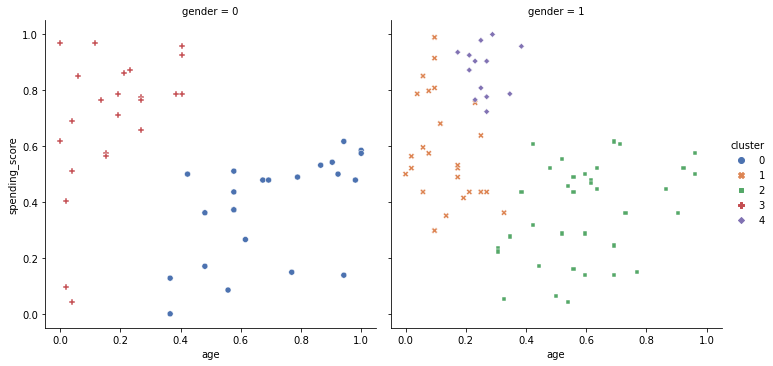

In [102]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="gender", palette="deep", data=train_scaled);

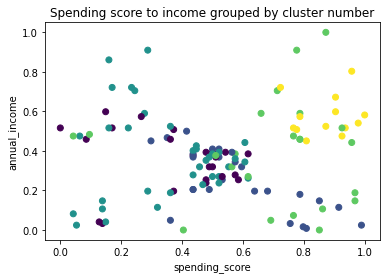

In [103]:
plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()

In [104]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,3
49,1,0.211538,0.204918,0.436170,1
25,1,0.692308,0.106557,0.138298,3
137,1,0.500000,0.475410,0.063830,3
177,0,0.769231,0.598361,0.148936,2


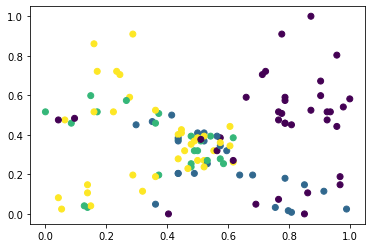

In [106]:
# looks like 5 clusters
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster);

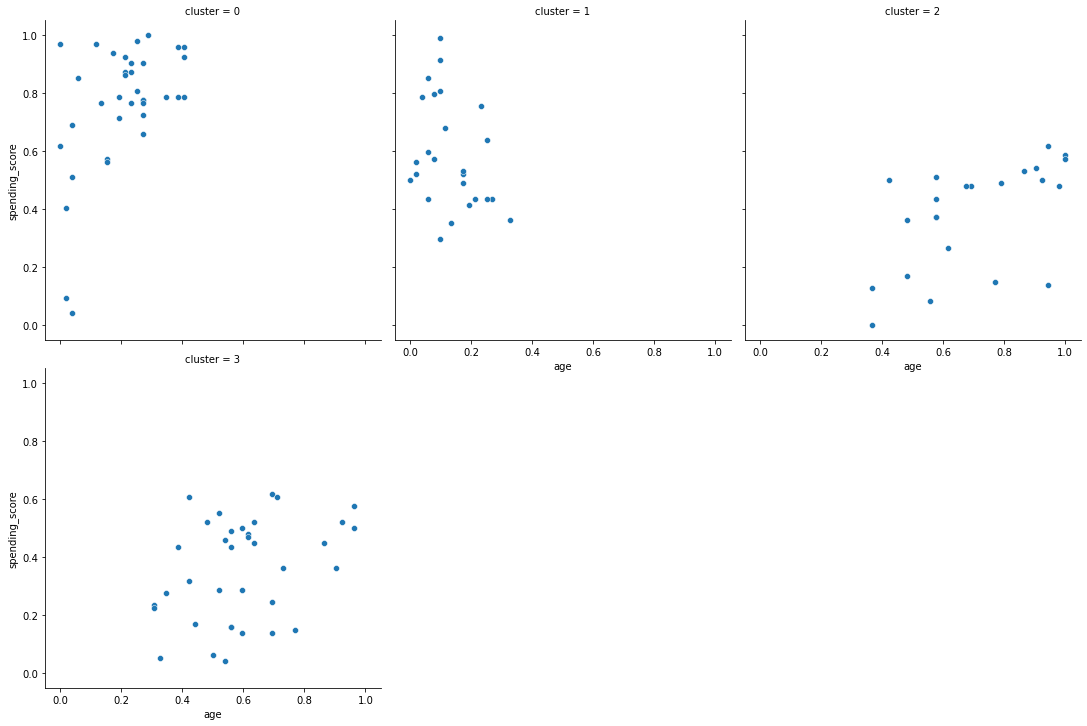

In [108]:
# extra visuals
sns.relplot(x="age", y="spending_score", col="cluster", col_wrap=3, data=train_scaled);

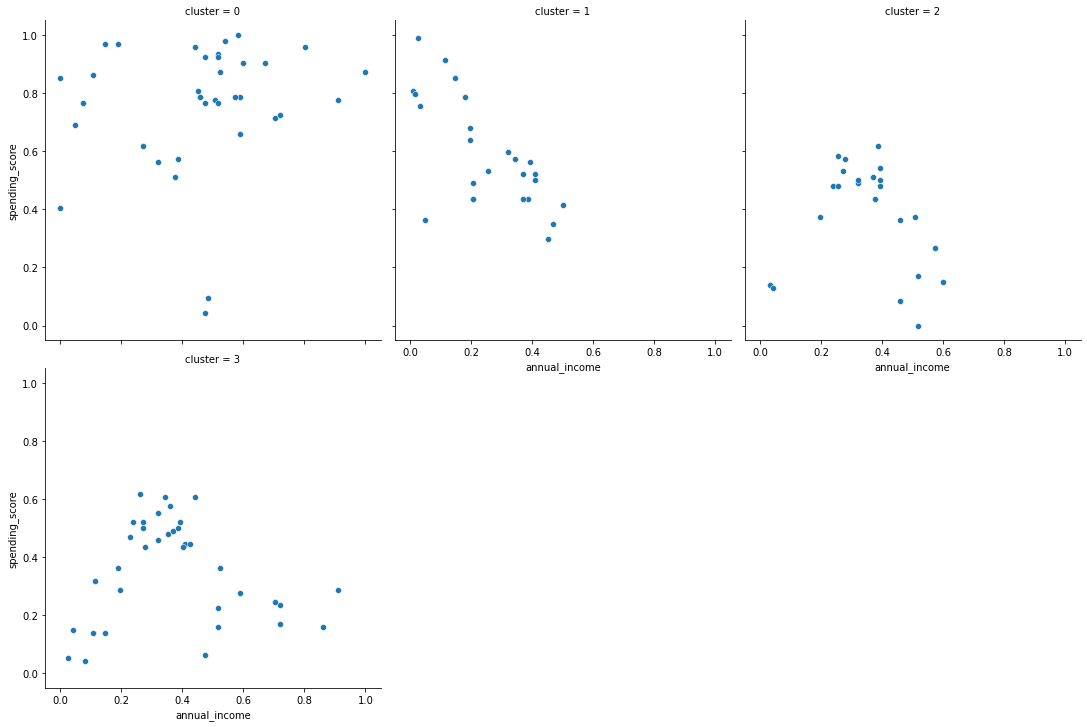

In [109]:
# now with annual income
sns.relplot(x="annual_income", y="spending_score", col="cluster", col_wrap=3, data=train_scaled);

## ~ 3. Now to compare unscaled data with the scaled ~

In [110]:
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,54,47,59
49,1,29,40,42
25,1,54,28,14
137,1,44,73,7
177,0,58,88,15


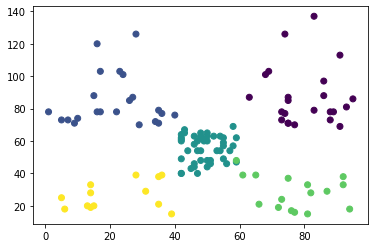

In [112]:
# Looks like the sweet spot is 5
# We'll use annual income and spending score this time since they had those lumps

# Fit K-Means
X = train.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.labels_
plt.scatter(train.spending_score, train.annual_income, c=train.cluster);

In [ ]:
### ^ the unscaled data has more clear clusters that don't overlap as much

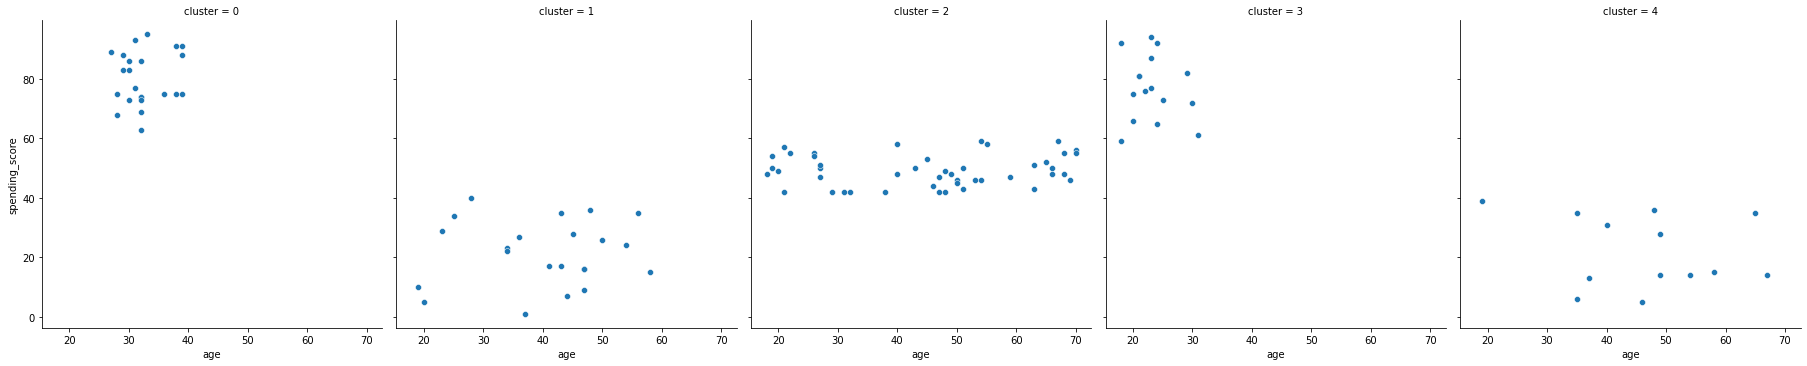

In [114]:
sns.relplot(x="age", y="spending_score", col="cluster", data=train);

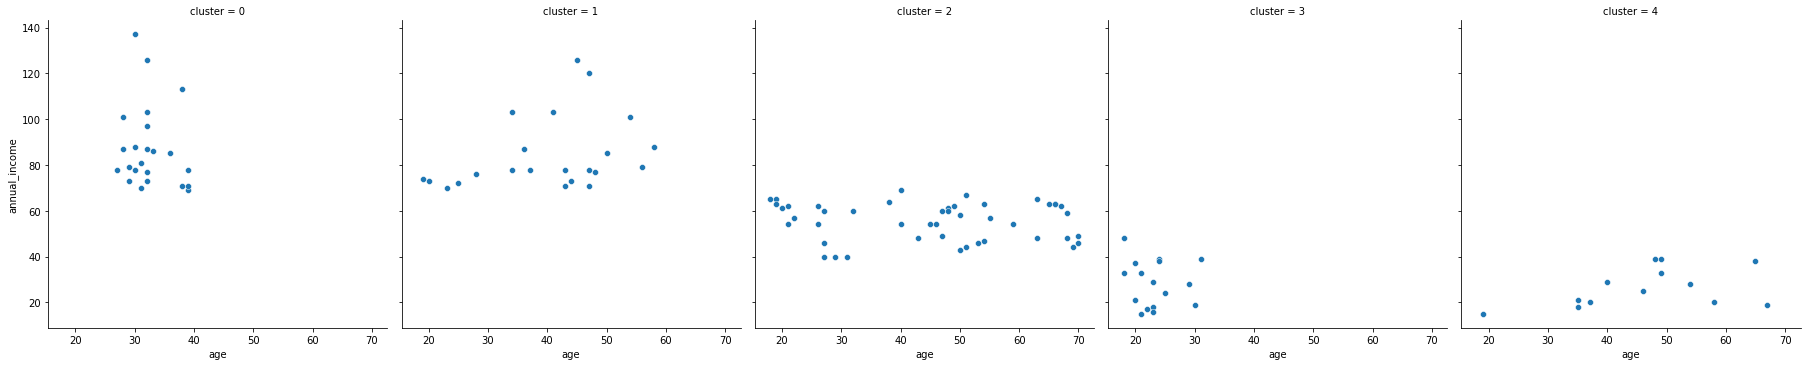

In [115]:
sns.relplot(x="age", y="annual_income", col="cluster", data=train);

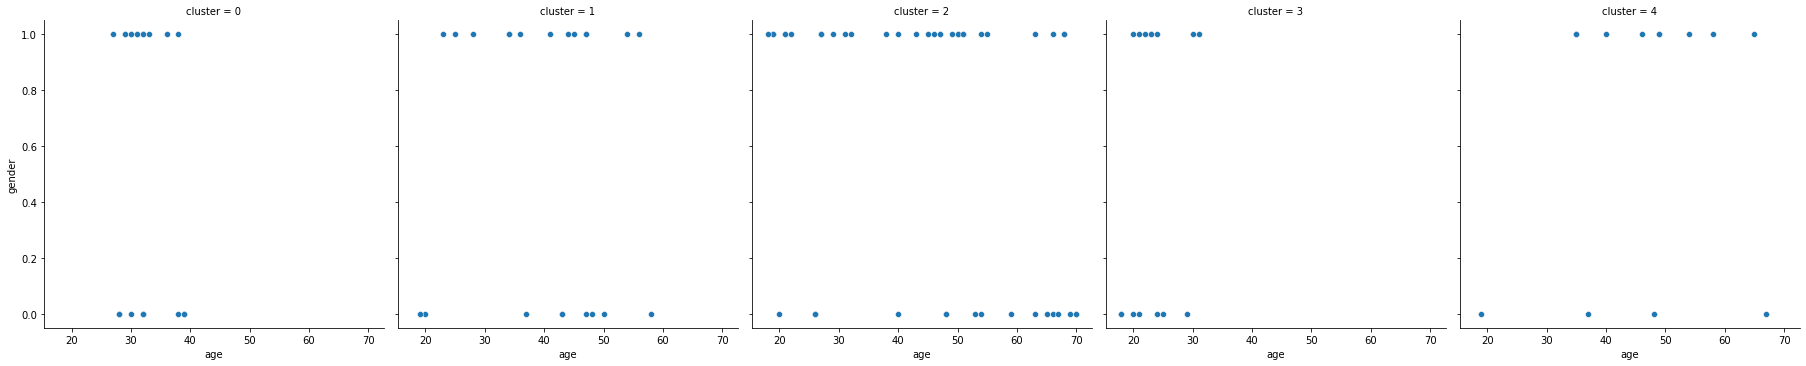

In [116]:
sns.relplot(x="age", y="gender", col="cluster", data=train);

#### Takeaways about our clusters from the above charts/features/clusters:
**Cluster 0** - Average Spenders (Could afford more)
 - Spending scores in 55-90 range
 - Incomes are in the top of the bottom half of incomes
 - Age/gender don't seem to have a huge difference
 - 64% women, 36% male
 - 25-40 year old males are not present (not sure why)
 
**Cluster 1** - Low Spenders
 - Bottom quarter of income
 - Bottom 40% of spending scores
 - 2/3 women, 1/3 male
 
**Cluster 2** - Spend way less than they make
 - Bottom half of spending ratio
 - Top half of income
 - Gender/age is evenly distributed
 - These folks might be savers or they're funding dependents maybe
 
**Cluster 3** - College Kids / Young People - Spend way more than they make
 - Top half of spending scores
 - Aged up to 30
 - Income is low, age is low
 - Gender is evenly split
 
**Cluster 4** - Young professionals, possibly family
 - top half of spending score
 - top half of income score
 - age range 28-40
 - 2/3 women and 1/3 male

# ~ Bonus ~

In [4]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [19]:
df_googlesheet.shape

(800, 2)

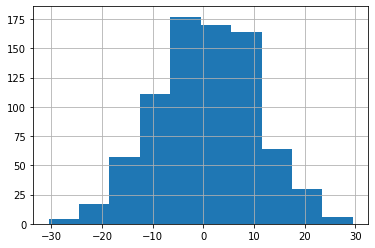

In [10]:
# distribution of x:
df_googlesheet.x.hist();

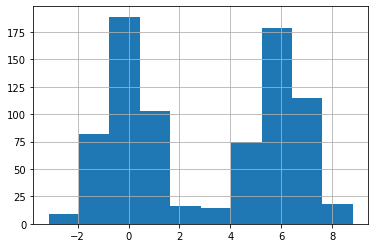

In [11]:
# distribution of y:
df_googlesheet.y.hist();

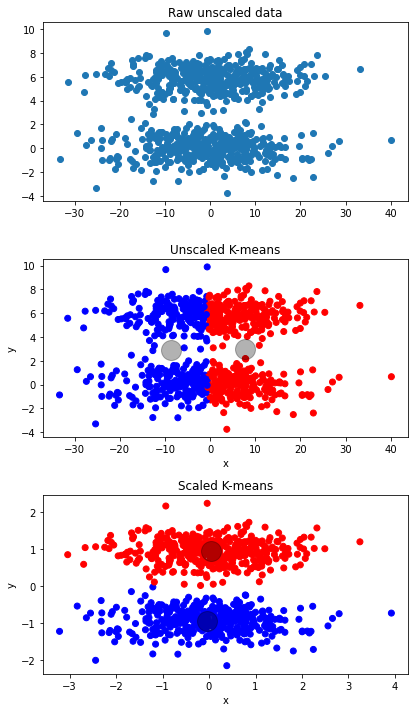

In [17]:
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# create data
rnorm = np.random.randn
x1 = rnorm(800) * 10  
y1 = np.concatenate([rnorm(400), rnorm(400) + 6])
df = df_googlesheet
df['x'] = x1
df['y'] = y1

# scale the data
scaler = StandardScaler()
cols = ['x', 'y']
df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

X = df[cols]
X_scaled = df_scaled[cols]


# create subplots
fig, axes = plt.subplots(3, 1, figsize=(6,10))

#plot on first axes
axes[0].scatter(x1, y1)
axes[0].set_title('Raw unscaled data')


# Kmeans on unscaled data and plot on 2nd axes
km = KMeans(2, random_state = 123)

clusters = km.fit_predict(X)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[1].scatter(df.x, df.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x='x', y= 'y', ax=axes[1], marker='o', alpha = 0.3, s=400, c='k')
axes[1].set_title('Unscaled K-means')


# Implement Kmeans on scaled data and plot on 3rd axes

clusters = km.fit_predict(X_scaled)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[2].scatter(df_scaled.x, df_scaled.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x= 'x', y= 'y', ax=axes[2], marker='o', alpha = 0.3, s=400, c='k')
axes[2].set_title('Scaled K-means')
# axes[2].set_xlim(-30,30)
# axes[2].set_ylim(-4,6)

plt.tight_layout()

### In this case, scaling the data vs. not scaling the data did not make much of a difference.